#### 전국 도시공원 표준데이터

* https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시의 공원에 대한 분포를 시각화
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현
* 필요한 패키지 : `pandas`, `plotnine`,`folium`
- plotnine : ggplot2 기반의 그래프 시각화 라이브러리
- folium : 지도를 출력해주는 라이브러리, plugins를 통해서 다양한 기능을 제공
* 공공데이터포털의 전국도시공원표준데이터 

In [2]:
# plotnine은 R의 ggplot2에 기반해 그래프를 시각화하는 라이브러리
# pip install plotnine 이놈도 conda로 하면 안깔림
# pip install folium
import numpy as np
import pandas as pd
import folium
from folium import plugins
from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 한글폴더 및 한글명파일을 불러올 떄 Initializing from file failed 에러가 발생
# engine = 'python' 옵션을 추가해서 이를 방지할 수 있다.
park = pd.read_csv('../data/data분석/전국도시공원표준데이터.csv', engine = 'python', 
                  encoding = 'EUC-KR')
park.shape


(18137, 20)

In [ ]:
# nan, null 값을 확인
park.isnull().sum()/len(park)

#####  누락데이터의 시각화 : missingno

###### 1.누락데이터의 시각화
데이터의 크기가 크면 어디에 누락데이터가 분포해 있는지 확인하기 힘들다. 이 때는 시각화를 통해 전체적인 누락데이터의 분포를 확인 할 수 있다. Missingno 패키지를 사용하면 누락데이터에 대한 시각화를 쉽게 할 수 있다.

###### 2. 누락 데이터의 종류
누락 데이터는 MCAR(Missing completely at random)과 MAR(Missing at random) 그리고 MNAR(Missing at not random)으로 나눌 수 있다.

* MCAR : MCAR은 변수의 종류와 변수의 값과 상관없이 전체에 걸쳐 무작위적으로 나타나는 것으로 이러한 누락 데이터는 분석에 큰 영향을 주지는 않는다. 실제로 MCAR의 경우는 거의 없다.
* MAR : 누락된 자료가 특정 변수와 관련되어 일어나지만 그 변수의 값과는 관계가 없는 경우이다. 예를 들어 어떤 설문조사에서 누락된 자료가 특정 변수들에 국한되어 발견되었는데 알고 보니 일부 대상자가 설문지 3페이지에 반대쪽 면이 있는 것을 모르고 채우지 않았을 경우 MAR로 볼 수 있다.
* MNAR : 누락된 변수의 값과 누락된 이유가 관련이 있는 경우이다. 예를 들어 노인에서 우울증에 대한 설문조사를 했는데 실제로 우울증이 심한 경우는 우울한 기분에 대해 자세히 조사하는 항목을 대답하는 것이 괴로워 일부러 회피하여 누락되는 경우 등이다. 일부 설문에 정치적인 이유로 일부러 대답을 회피하거나 하는 경우도 MNAR로 볼수 있다.

#### 3 . 설치

* pip install quilt

* pip install missingno

* https://github.com/ResidentMario/missingno

In [ ]:
import missingno as msno
# 데이터의 null값이 어떻게 위치해 있는지 maxtrix로 시각화
msno.matrix(park)

In [ ]:
# null값의 bar 시각화
# msno의 다른타입의 시각화를 동시에 하면 서로 곂침
msno.bar(park)

In [ ]:
# heatmap : 색상코딩시스템을 사용해 다양한 값을 나타내는 데이터 그래픽
# 웹페이지 및 템플렛에서 사용자의 행동을 표시하는데 가장 일반적으로 사용됨

msno.heatmap(park)

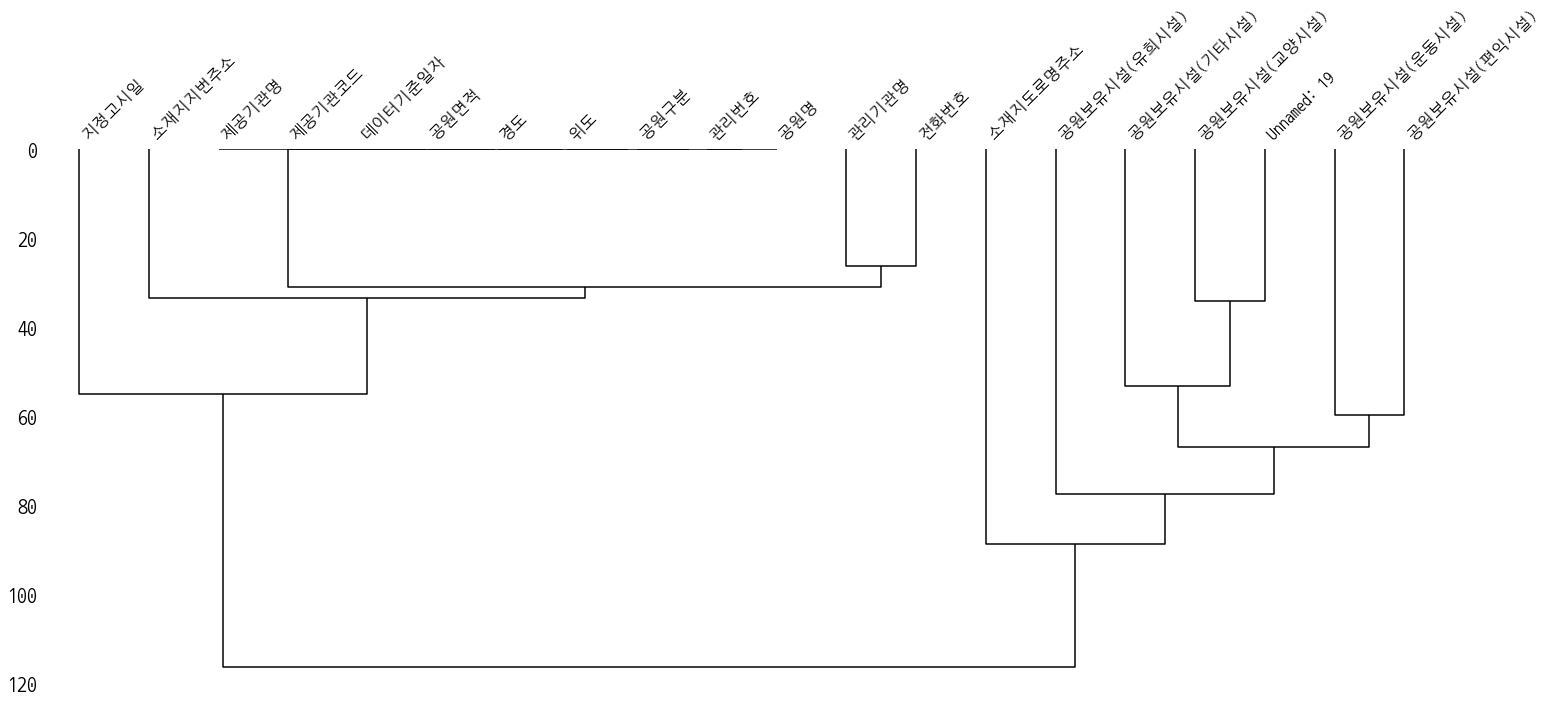

In [14]:
# msno.dendrogram: 각 단계에서 관측치의 군집화를 통해 그룹과 이들의 유사성
# 수준을 표시하는 트리다이어그램을 말한다.유사성의 수준은 수직축을 따라 측정되거나
# 사용자가 거리수준을 표시할 수 있다.
msno.dendrogram(park)

##### 불필요한 컬럼을 제거하기

In [4]:
park.columns
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)',
                   '공원보유시설(편익시설)','공원보유시설(교양시설)'
                   ,'공원보유시설(기타시설)','지정고시일', '관리기관명',
                   'Unnamed: 19'], inplace=True)
park.columns
                   

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

#### 2. 위경도 시각화

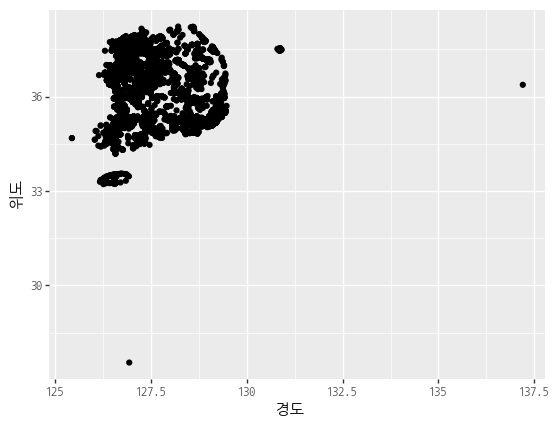

<ggplot: (-9223371888862055232)>

In [175]:
(ggplot(park) 
 + aes(x='경도', y ='위도')
+ geom_point()
+theme(text=element_text(family='NanumGothicCoding')))

In [62]:
# 이상치 확인
park[park['위도'] <=30]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


In [5]:
# 이상치 제거
park = park.drop(index=[12926,2986,9426,374])

### 3. 데이터 전처리

* 시도 결측치 처리
    - 다른 데이터로 대체
    - 도로명 혹은 지번 둘 중 하나만 있다면 다른 데이터로 대체
* 아웃라이어데이터 제거 혹은 대체
    - 위걍도가 국내범위를 벗어나는 데이터의 경우를 제외

In [71]:
park.dtypes
# 공원면적 데이터타입이 float이기 때문에 park['공원면적'].str을 사용할 수 없다.
# 숫자데이터에 콤마가 포함되어 있다면 
# park['공원면적'] = park['공원면적'].str.replace('.','').astype(float)
park['공원면적']
display(park['공원면적'].head())

0     9137.0
1    33756.0
2      646.0
3     1620.0
4     1009.0
Name: 공원면적, dtype: float64

In [14]:
# 그래프에 면적에 따라 크기를 표현하기 위해서 공원면적비율을 설정
park['공원면적비율'] = park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    0.955877
1    1.837281
2    0.254165
3    0.402492
4    0.317648
Name: 공원면적비율, dtype: float64

In [182]:
# 도로명 주소의 널값의 갯수
print(park['소재지도로명주소'].isnull().sum())
# 지번주소의 널값의 갯수
print(park['소재지지번주소'].isnull().sum())
park.shape

10094
979


(18133, 13)

In [181]:
# 도로명이 null, 지번은 notnull
park[park['소재지도로명주소'].isnull()&park['소재지지번주소'].notnull()].shape


# 소재지도로명주소의 결측치를 소재지지번주소로 채워넣기
# fillna() 함수


(10094, 13)

In [9]:

# 생각해보니 na값을 자동으로 채워주니까 isnull구분 안해도 되는듯
# inplace = 기존객체를 변경
park['소재지도로명주소'].fillna(park['소재지지번주소'],inplace=True)

In [184]:
park.shape

(18133, 13)

In [8]:
# 시도 컬럼추가
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]

In [212]:
# 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력
# 조금 더 정확하게 출력하려면 대한민국의 위경도 데이터의 범위를 지정
park_loc_notnull = park.loc[(park['위도']>32)&(park['경도']<132)&(park['시도'].notnull())]

In [353]:
# park_loc_notnull에서 시도별로 공원의 건수
a = park_loc_notnull['시도'].unique()
for i in a:
    print(i,park_loc_notnull[park_loc_notnull['시도']== i]['시도'].count())

부산광역시 653
강원도 647
서울특별시 1744
경상북도 917
전라남도 1880
대전광역시 497
울산광역시 887
전라북도 1137
경기도 3318
충청북도 898
충청남도 1723
경상남도 1825
광주광역시 429
인천광역시 675
세종특별자치시 70
제주특별자치도 246
대구광역시 586


In [251]:
#park_loc_notnull= park_loc_notnull.drop(11184,0)
#park = park.drop(11184,0)

#### 시도별공원 시각화

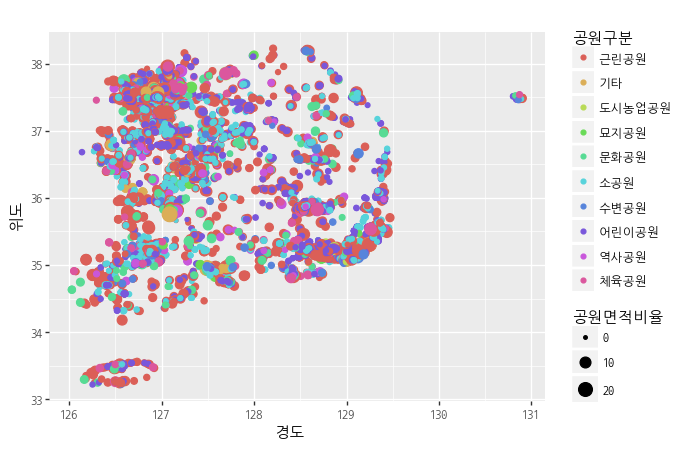

<ggplot: (-9223371888855154036)>

In [232]:
# ggplot(), aes(x,y,color) : 시도별로 공원의 색상을 다르게
(ggplot(park_loc_notnull) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+theme(text=element_text(family='NanumGothicCoding')))

# 분석결과
# 전국적으로 어린이 공원이 가장 많이 분포되어 있다.


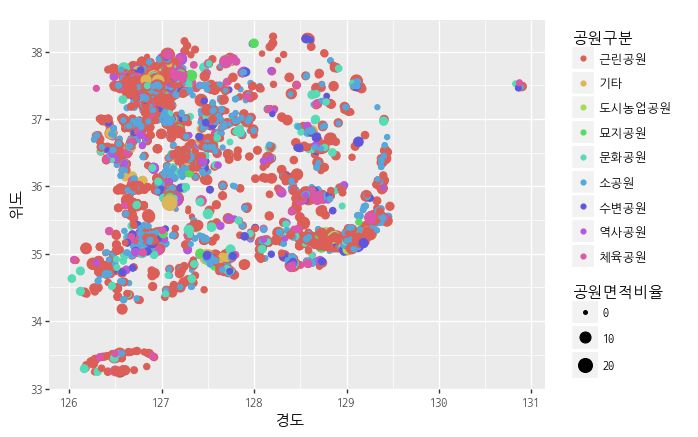

<ggplot: (-9223371888861281196)>

In [233]:
# 어린이 공원을 제외한 분포도

(ggplot(park_loc_notnull[park_loc_notnull['공원구분']!='어린이공원']) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+theme(text=element_text(family='NanumGothicCoding')))

In [252]:
# 4. 시도별 공원비율
park_sido = pd.DataFrame(park['시도'].value_counts())

# value_counts normalize = 카운트를 전체로 나누어 표준화해줌
park_sido_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
# reset_index를 통해서 index가 시도인 것을 숫자로 바꿈
park_sido = park_sido.merge(park_sido_normalize, left_index= True,right_index=True).reset_index()
park_sido.columns = ['시도','합계','비율']
park_sido.sort_values(by='합계', ascending = False)



,시도,합계,비율
0,경기도,3318,0.182991
1,전라남도,1880,0.103684
2,경상남도,1825,0.100651
3,서울특별시,1744,0.096184
4,충청남도,1723,0.095025
5,전라북도,1137,0.062707
6,경상북도,917,0.050574
7,충청북도,898,0.049526
8,울산광역시,887,0.048919
9,인천광역시,675,0.037227


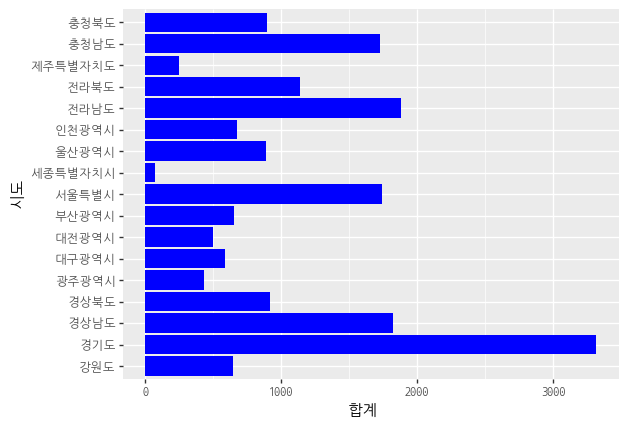

<ggplot: (-9223371888844632508)>

In [264]:
# 어린이 공원을 제외한 분포도

(ggplot(park_sido.sort_values(by='합계', ascending = False)) 
 + aes(x='시도', y ='합계')
 
# geom_bar의 옵션 stat ='identity'는 반드시 정의
# 이는 y축의 높이를 데이터의 값으로 하는 bar그래프의 형태를 지정
# position : 막대의 위치, dodge는 막대의 위치를 개별적인 막대로 나란히 표현
+ geom_bar(stat='identity',fill='blue', position = 'dodge')
# coord(coordinate) 그래프의 모양을 수정, flip은 x, y축을 반전시킴
# x축과 y축의 위치가 바뀜과 동시에 가로막대로 표현
+ coord_flip()
+theme(text=element_text(family='NanumGothicCoding')))

In [7]:
park_sido = pd.DataFrame(park['시도'].value_counts())

# value_counts normalize = 카운트를 전체로 나누어 표준화해줌
park_sido_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
# reset_index를 통해서 index가 시도인 것을 숫자로 바꿈
park_sido = park_sido.merge(park_sido_normalize, left_index= True,right_index=True).reset_index()
park_sido.columns = ['시도','합계','비율']
park_sido.sort_values(by='합계', ascending = False)

KeyError: '시도'

In [278]:
park_a = pd.DataFrame(park['공원구분'].value_counts())
park_a_n = pd.DataFrame(park['공원구분'].value_counts(normalize=True))
# reset_index를 통해서 index가 시도인 것을 숫자로 바꿈
park_a = park_a.merge(park_a_n, left_index= True,right_index=True).reset_index()

park_a.columns = ['공원종류','합계','비율']
park_a.sort_values(by='합계', ascending = False)


,공원종류,합계,비율
0,어린이공원,9986,0.550739
1,근린공원,4168,0.229870
2,소공원,2647,0.145985
3,문화공원,322,0.017759
4,수변공원,301,0.016600
5,기타,260,0.014339
6,체육공원,228,0.012574
7,역사공원,164,0.009045
8,묘지공원,43,0.002371
9,도시농업공원,13,0.000717


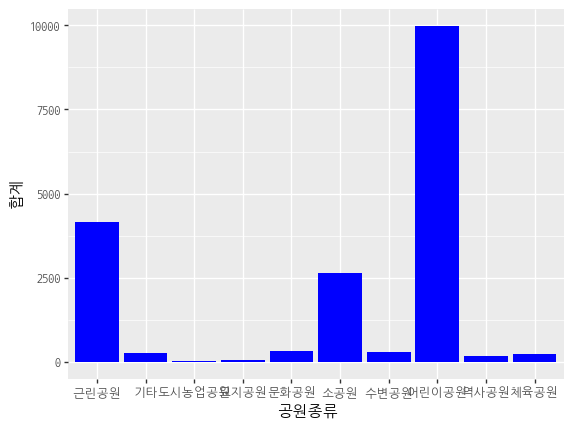

<ggplot: (-9223371888853250964)>

In [281]:
(ggplot(park_a.sort_values(by='합계', ascending = False)) 
 + aes(x='공원종류', y ='합계')
 
+ geom_bar(stat='identity',fill='blue', position = 'dodge')
+theme(text=element_text(family='NanumGothicCoding')))

#### 경기도 관할 공원 분포

* 경기도에 가장 많은 공원이 분포되어 있는데 어떻게 분포되어 있는지를 분석 후 시각화
* folium을 이용한 지도 위치정보 시각화

In [6]:
gg = park[park['시도']=='경기도']
gg

KeyError: '시도'

In [ ]:
gg_park = gg['공원구분'].value_counts().reset_index()
gg_park

In [ ]:
(ggplot(gg) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+ geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='NanumGothicCoding')))

In [305]:
gg_suwon = gg[gg['구군']=='수원시']
gg_suwon

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
16666,41117-00081,소담,어린이공원,경기도 수원시 영통구 태장로 84 (망포동),경기도 수원시 영통구 태장로 84 (망포동),37.238966,127.055529,900.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.300000,경기도,수원시
16667,41111-00080,제17호 소공원(송원),소공원,경기도 수원시 장안구 조원동 912-2,경기도 수원시 장안구 조원동 912-2,37.307711,127.011307,3002.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.547905,경기도,수원시
16668,41113-00081,제18호 소공원,소공원,경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),경기도 수원시 권선구 삼천병마로1598번길 28-28 (오목천동),37.245841,126.966211,174.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.131909,경기도,수원시
16669,41113-00082,제28호 소공원,소공원,경기도 수원시 권선구 권선동 1367-14,경기도 수원시 권선구 권선동 1367-14,37.247521,127.026383,1104.8,031-228-4282,2019-09-07,3740000,경기도 수원시,0.332385,경기도,수원시
16670,41113-00083,제29호 소공원,소공원,경기도 수원시 권선구 권선동 1367-26,경기도 수원시 권선구 권선동 1367-26,37.248903,127.020938,1030.3,031-228-4282,2019-09-07,3740000,경기도 수원시,0.320983,경기도,수원시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,41117-00009,벽적골,근린공원,경기도 수원시 영통구 영통2동 969-2,경기도 수원시 영통구 영통2동 969-2,37.248463,127.062524,13502.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.161981,경기도,수원시
16923,41117-00011,선주리들,근린공원,"경기도 수원시 영통구 동탄원천로915번길 33 (매탄동, 주공그린빌)","경기도 수원시 영통구 동탄원천로915번길 33 (매탄동, 주공그린빌)",37.256047,127.043994,19014.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.378913,경기도,수원시
16924,41117-00012,영통사,근린공원,경기도 수원시 영통구 봉영로 1658 (영통동),경기도 수원시 영통구 봉영로 1658 (영통동),37.257835,127.078038,9932.0,031-228-4282,2019-09-07,3740000,경기도 수원시,0.996594,경기도,수원시
16925,41117-00010,살구골,근린공원,"경기도 수원시 영통구 매영로 366 (영통동, 현대아파트)","경기도 수원시 영통구 매영로 366 (영통동, 현대아파트)",37.250664,127.071687,11753.0,031-228-4282,2019-09-07,3740000,경기도 수원시,1.084113,경기도,수원시


In [ ]:
(ggplot(gg_suwon) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+ geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='NanumGothicCoding')))

In [346]:
geo_df = gg_suwon
map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()], zoom_start = 12)

for n in geo_df.index:
    park_name = geo_df.loc[n,'공원명'] + '-'+geo_df.loc[n,'소재지도로명주소']
    icon_color = 'blue'
    # flugins는 만들어진 패키지여서 그런지 파일 전체를 넣어서 작동함
    # folium에 들어있는 함수들은 직접 위경도, 크기, popup등을 추가해줘야함
    folium.CircleMarker(
        location = [geo_df.loc[n,'위도'],geo_df.loc[n,'경도']],
        radius = geo_df.loc[n,'공원면적비율'],
        popup = park_name,
        fill = icon_color,
        fill_color = icon_color 
    ).add_to(map)
# popup의 한글 깨짐은 저장해서 해결하거 google로 해결
map

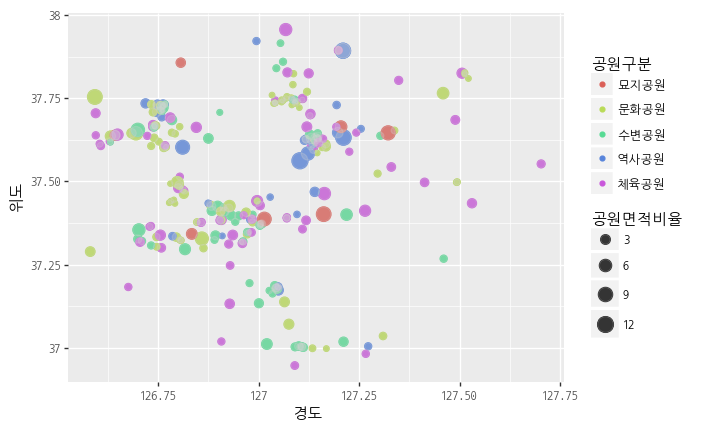

<ggplot: (-9223371888844715952)>

In [323]:
# 1. 경기도 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_s = gg.loc[gg['공원구분'].str.match(park_type)]
(ggplot(gg_s) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+ geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='NanumGothicCoding')))

#### 연습문제 서울시 관할 공원분포

In [20]:
gg_s = park[park['시도'] == '서울특별시']
gg_s_col = gg_s.columns
gg_s['제공기관명'].unique()


array(['서울특별시 송파구', '서울특별시 도봉구', '서울특별시 성동구', '서울특별시 관악구', '서울특별시 광진구',
       '서울특별시 용산구', '서울특별시 성북구', '서울특별시 강동구', '서울특별시 중구', '서울특별시 강서구',
       '서울특별시 금천구', '서울특별시 은평구', '서울특별시 영등포구', '서울특별시 강북구', '서울특별시 동작구'],
      dtype=object)

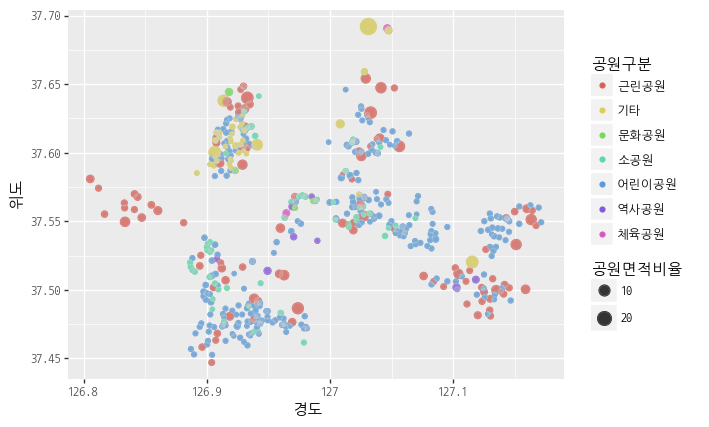

<ggplot: (-9223371947804094336)>

In [21]:

(ggplot(gg_s) 
 + aes(x='경도', y ='위도',color='공원구분',size ='공원면적비율')
+ geom_point()
+ geom_jitter(color='lightgray',alpha=0.25)
+theme(text=element_text(family='NanumGothicCoding')))

# 실제 지도와는 비율이 다르기 때문에 실제와 달라보임

In [17]:
gg_s_a = gg_s['구군'].value_counts().reset_index()
gg_s_a.columns = ['구군','합계']
gg_s[gg_s['위도']>37.4]['구군']

213      송파구
215      송파구
216      송파구
217      송파구
221      송파구
        ... 
17997    동작구
18006    동작구
18008    동작구
18021    동작구
18027    동작구
Name: 구군, Length: 499, dtype: object

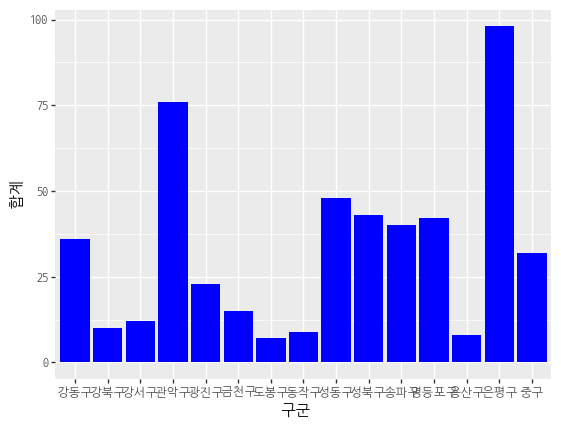

<ggplot: (-9223371947804295264)>

In [18]:
(ggplot(gg_s_a.sort_values(by='합계', ascending = False)) 
 + aes(x='구군', y ='합계')
 
+ geom_bar(stat='identity',fill='blue', position = 'dodge')
+theme(text=element_text(family='NanumGothicCoding')))

In [19]:
map = folium.Map(location=[gg_s['위도'].mean(),gg_s['경도'].mean()], zoom_start = 12)
for n in gg_s.index:
    park_name = gg_s.loc[n,'공원명'] + '-'+gg_s.loc[n,'소재지도로명주소']
    icon_color = 'blue'
    # flugins는 만들어진 패키지여서 그런지 파일 전체를 넣어서 작동함
    # folium에 들어있는 함수들은 직접 위경도, 크기, popup등을 추가해줘야함
    folium.CircleMarker(
        location = [gg_s.loc[n,'위도'],gg_s.loc[n,'경도']],
        radius = gg_s.loc[n,'공원면적비율'],
        popup = park_name,
        fill = icon_color,
        fill_color = icon_color 
    ).add_to(map)

map

In [378]:
gg_s.rename(columns={"위도":"latitude"}, inplace = True)
gg_s.rename(columns={"경도":"longitude"}, inplace = True)
gg_s = gg_s.loc[:,['latitude','longitude']]
gg_s

,latitude,longitude
213,37.498469,127.125124
214,37.507553,127.094089
215,37.493407,127.130026
216,37.497007,127.140981
217,37.491603,127.123473
...,...,...
18033,37.505644,126.942102
18034,37.509385,126.957863
18035,37.505268,126.948180
18036,37.487382,126.974669


In [379]:
m = folium.Map([36,128], zoom_start=7)
plugins.MousePosition().add_to(m)
plugins.MarkerCluster(gg_s).add_to(m)

m

In [386]:
heat_data = gg_s.groupby(['latitude','longitude'])

m = folium.Map([gg_s['latitude'].mean(),gg_s['longitude'].mean()],zoom_start=12)
folium.plugins.HeatMap(gg_s).add_to(m)
m

In [ ]:
import folium
import json

map = folium.Map(
    location = [37.5838699,127.0565831],
    zoom_start = 10
)

with open('../data/seoul_municipalities_geo.json','rt',encoding = 'utf-8') as f:
    geo = json.loads(f.read())
    
    
# geo
folium.GeoJson(
    geo,
    name ='seoul_municipalities'
).add_to(map)

map.save('../data/seoul_map.html')
map